In [ ]:
import pandas as pd

# 파일 경로 설정
df = pd.read_csv('/content/MelonChart_Full_with_Genres.csv')

# 데이터의 처음 몇 행 확인
df.head()

In [ ]:
# '장르' 열에 있는 고유한 값들 추출
genres = df['genre'].unique()

# 고유한 장르들 출력
print(genres)

In [6]:
# '장르' 열에 있는 데이터를 쉼표(,)를 기준으로 분리하여 새로운 행으로 만들기
new_rows = []
for index, row in df.iterrows():
    genres = row['genre'].split(', ')  # 쉼표(,)를 기준으로 장르 분리
    for genre in genres:
        if genre == '-': #장르가 '-'인 경우 '기타로'변경
          genre = '기타'
        new_row = row.copy()  # 원래의 행 복사
        new_row['genre'] = genre  # 장르 열의 값을 각각의 장르로 변경
        new_rows.append(new_row)

# 새로운 데이터프레임 생성
new_data = pd.DataFrame(new_rows)

# 새로운 CSV 파일로 저장
df2 = '/content/MelonChart_Separated_Genres.csv'
new_data.to_csv(df2, index=False)

In [7]:
# 파일 경로 설정
df = pd.read_csv('/content/MelonChart_Separated_Genres.csv')

# 데이터의 처음 몇 행 확인
df.head()

,year,title,artist,number,genre
0,1990,희망사항,변진섭,52451,발라드
1,1990,사랑일뿐야,김민우,53615,발라드
2,1990,유리창엔 비,햇빛촌,53088,발라드
3,1990,비오는 날 수채화,김현식,104134,록/메탈
4,1990,비오는 날 수채화,김현식,104134,국내영화


In [8]:
# '장르' 열에 있는 고유한 값들 추출
genres = df['genre'].unique()

# 고유한 장르들 출력
print(genres)

# 장르별 노래 수 세기
genre_counts = df['genre'].value_counts()

print(genre_counts)

['발라드' '록/메탈' '국내영화' '댄스' '포크/블루스' '성인가요/트로트' '국내드라마' '랩/힙합' '재즈' '보컬재즈'
 'R&B/Soul' '인디음악' '일렉트로니카' '기타']
발라드         724
댄스          406
록/메탈        175
랩/힙합        175
R&B/Soul    115
국내드라마        76
포크/블루스       49
인디음악         38
성인가요/트로트     21
국내영화          8
일렉트로니카        5
재즈            1
보컬재즈          1
기타            1
Name: genre, dtype: int64


In [6]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설치


In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

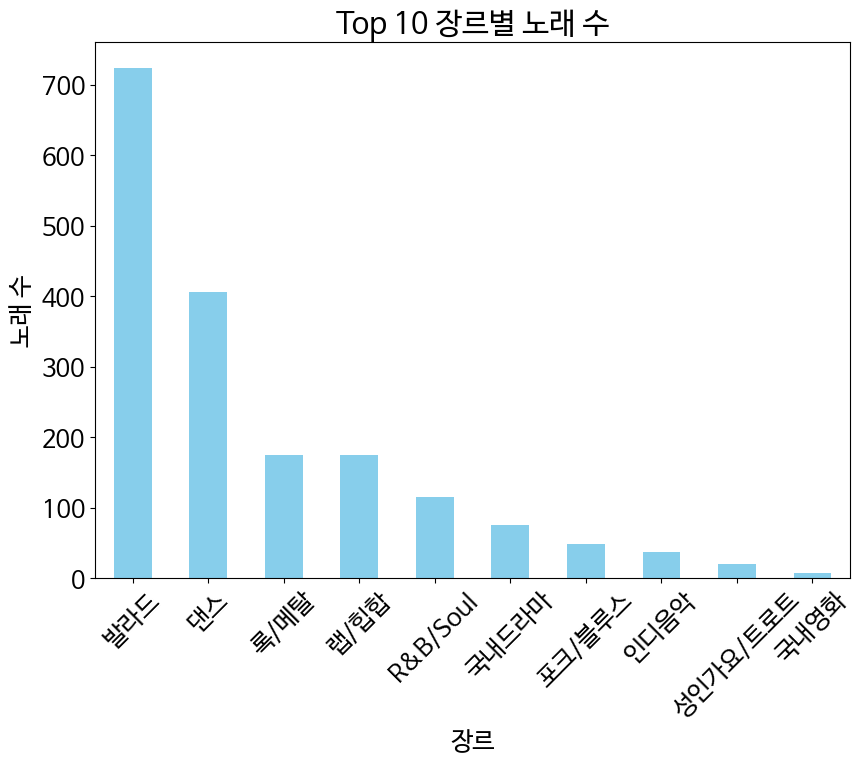

In [9]:
import matplotlib.pyplot as plt
import pandas as pd


# 파일 경로 설정
df = pd.read_csv('/content/MelonChart_Separated_Genres.csv')

# 장르별 노래 수 세기
genre_counts = df['genre'].value_counts()

# Top N 장르 추출 (예: 상위 10개 장르)
top_n = 10
top_genres = genre_counts.head(top_n)

# 그래프 그리기
plt.figure(figsize=(9, 8))
top_genres.plot(kind='bar', color='skyblue')
plt.title('Top {} 장르별 노래 수'.format(top_n))
plt.xlabel('장르')
plt.ylabel('노래 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

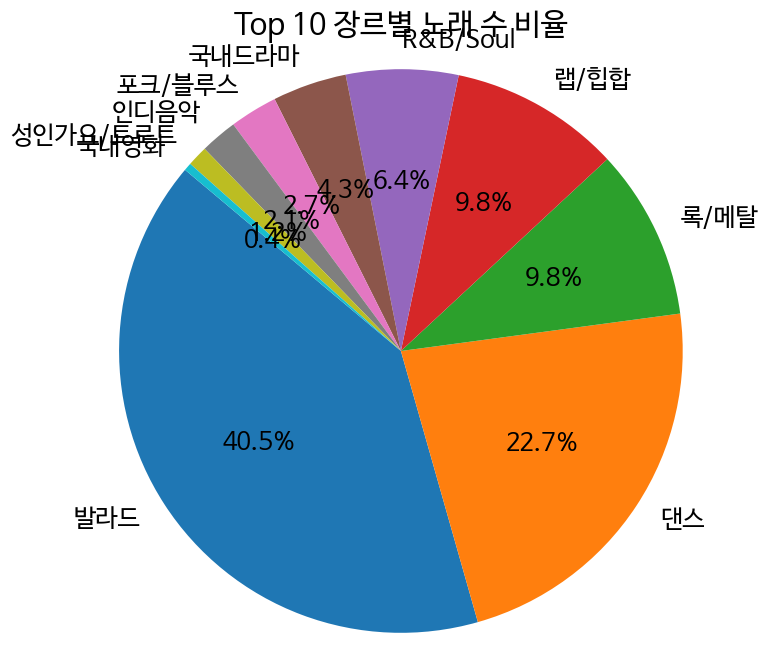

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로 설정 (장르가 나눠진 파일)
df = '/content/MelonChart_Separated_Genres.csv'

# Top N 장르 추출 (예: 상위 10개 장르)
top_n = 10
top_genres = genre_counts.head(top_n)

# 그래프 그리기 - 원 그래프
plt.figure(figsize=(8, 8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top {} 장르별 노래 수 비율'.format(top_n))
plt.show()

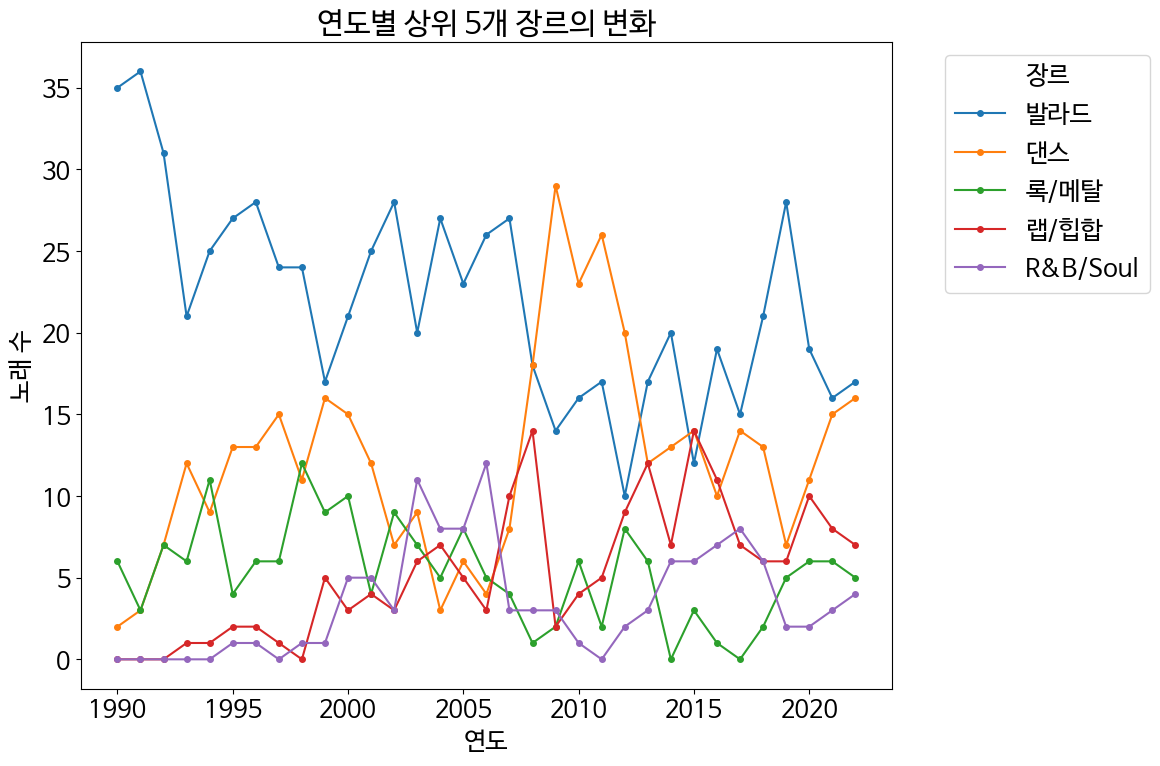

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로 설정 (장르가 나눠진 파일)
file_path = '/content/MelonChart_Separated_Genres.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# 연도별 장르별 노래 수 세기
genre_counts_by_year = df.groupby(['year', 'genre']).size().unstack().fillna(0)

# 상위 5개 장르 추출
top_5_genres = df['genre'].value_counts().head(5).index

# 상위 5개 장르만을 이용하여 연도별 노래 수 추출
top_5_genres_by_year = genre_counts_by_year[top_5_genres]

# 꺾은선 그래프 그리기
plt.figure(figsize=(12, 8))
for genre in top_5_genres_by_year.columns:
    plt.plot(top_5_genres_by_year.index, top_5_genres_by_year[genre], marker='o', label=genre, markersize=4)

plt.title('연도별 상위 5개 장르의 변화')
plt.xlabel('연도')
plt.ylabel('노래 수')
plt.legend(title='장르', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# import pandas as pd

# # 차트 데이터프레임 로드
# df = pd.read_csv('/content/MelonChart_Separated_Genres.csv')

# # 연도, 장르 컬럼 선택
# df = df[['year', 'genre']]

# # 연도별 장르별 노래 수 집계
# genre_count_by_year = df.groupby(['year','genre']).size().unstack(fill_value=0)

# # 인덱스 재설정
# genre_count_by_year.index.name = None
# genre_count_by_year.reset_index(inplace=True)

# # 출력
# print(genre_count_by_year.head())

genre  index  R&B/Soul  국내드라마  국내영화  기타  댄스  랩/힙합  록/메탈  발라드  보컬재즈  성인가요/트로트  \
0       1990         0      0     1   0   2     0     6   35     0         3   
1       1991         0      0     0   0   3     0     3   36     0         4   
2       1992         0      1     0   0   7     0     7   31     0         2   
3       1993         0      4     3   0  12     1     6   21     0         3   
4       1994         0      2     0   0   9     1    11   25     1         2   

genre  인디음악  일렉트로니카  재즈  포크/블루스  
0         0       0   0       5  
1         0       0   0       4  
2         0       0   0       3  
3         0       0   0       3  
4         0       0   1       2  


In [12]:
import pandas as pd

# CSV 파일 읽기
file_path = 'MelonChart_Separated_Genres.csv'
data = pd.read_csv(file_path)

# 연도와 장르로 그룹화하여 음악 수(count) 계산
grouped = data.groupby(['year', 'genre']).size().reset_index(name='count')

# 필요한 장르 목록
desired_genres = ['발라드', '록/메탈', '국내영화', '댄스', '포크/블루스', '성인가요/트로트', '국내드라마', '랩/힙합', '재즈', '보컬재즈', 'R&B/Soul', '인디음악', '일렉트로니카', '기타']

# 연도별 장르의 음악 수를 담을 딕셔너리 생성
genre_count_by_year = {'Year': list(range(1990, 2023))}

# 연도별 장르의 음악 수 계산하여 딕셔너리에 추가
for genre in desired_genres:
    genre_count_by_year[genre] = []

for year in range(1990, 2023):
    year_data = grouped[grouped['year'] == year].set_index('genre')
    year_dict = {genre: year_data.loc[genre, 'count'] if genre in year_data.index else 0 for genre in desired_genres}

    for genre in desired_genres:
        genre_count_by_year[genre].append(year_dict[genre])

# 결과 출력
result_df = pd.DataFrame(genre_count_by_year)
print(result_df)

# 결과를 CSV 파일로 저장
result_df.to_csv('Genre_count.csv', index=False)


    Year  발라드  록/메탈  국내영화  댄스  포크/블루스  성인가요/트로트  국내드라마  랩/힙합  재즈  보컬재즈  \
0   1990   35     6     1   2       5         3      0     0   0     0   
1   1991   36     3     0   3       4         4      0     0   0     0   
2   1992   31     7     0   7       3         2      1     0   0     0   
3   1993   21     6     3  12       3         3      4     1   0     0   
4   1994   25    11     0   9       2         2      2     1   1     1   
5   1995   27     4     1  13       5         0      0     2   0     0   
6   1996   28     6     1  13       2         0      0     2   0     0   
7   1997   24     6     1  15       0         3      0     1   0     0   
8   1998   24    12     0  11       1         1      0     0   0     0   
9   1999   17     9     0  16       1         1      0     5   0     0   
10  2000   21    10     0  15       0         0      1     3   0     0   
11  2001   25     4     0  12       0         0      0     4   0     0   
12  2002   28     9     0   7       0 

In [37]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
from sklearn.metrics import mean_squared_error
import numpy as np

# CSV 파일 읽기
file_path = 'Genre_count.csv'
data = pd.read_csv(file_path)

# 2022년 까지 데이터 추출
data_2022 = data[data['Year'] <= 2022].drop('Year', axis=1).values.flatten()

# 파라미터 후보군
p = q = range(0, 3)
d = [2]
parameters = product(p, d, q)
parameters_list = list(parameters)

# 최적의 파라미터 찾기
best_rmse, best_params = np.inf, None
for param in parameters_list:
    try:
        rmse_values = []
        for idx, genre in enumerate(data.columns[1:]):
            genre_data = data[genre].values

            # ARIMA 모델 학습
            model = ARIMA(genre_data, order=param)
            model_fit = model.fit()

            # 2023년 예측
            forecast = model_fit.forecast(steps=1)
            prediction = forecast[0]

            # RMSE 계산
            rmse = np.sqrt(mean_squared_error([data_2022[idx]], [prediction]))
            rmse_values.append(rmse)

        # 모든 장르에 대한 RMSE 평균 계산
        avg_rmse = np.mean(rmse_values)

        # 최적의 파라미터 업데이트
        if avg_rmse < best_rmse:
            best_rmse = avg_rmse
            best_params = param
    except:
        continue

# 최적의 파라미터와 RMSE 출력
print(f"최적의 파라미터: {best_params}")
print(f"RMSE: {best_rmse}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.p

최적의 파라미터: (1, 2, 0)
RMSE: 4.20239260470976


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2023년 각 장르의 예측 음악 수:
발라드: 15
록/메탈: 4
국내영화: 0
댄스: 18
포크/블루스: 0
성인가요/트로트: 1
국내드라마: 1
랩/힙합: 5
재즈: 0
보컬재즈: 0
R&B/Soul: 5
인디음악: -1
일렉트로니카: 0
기타: 0


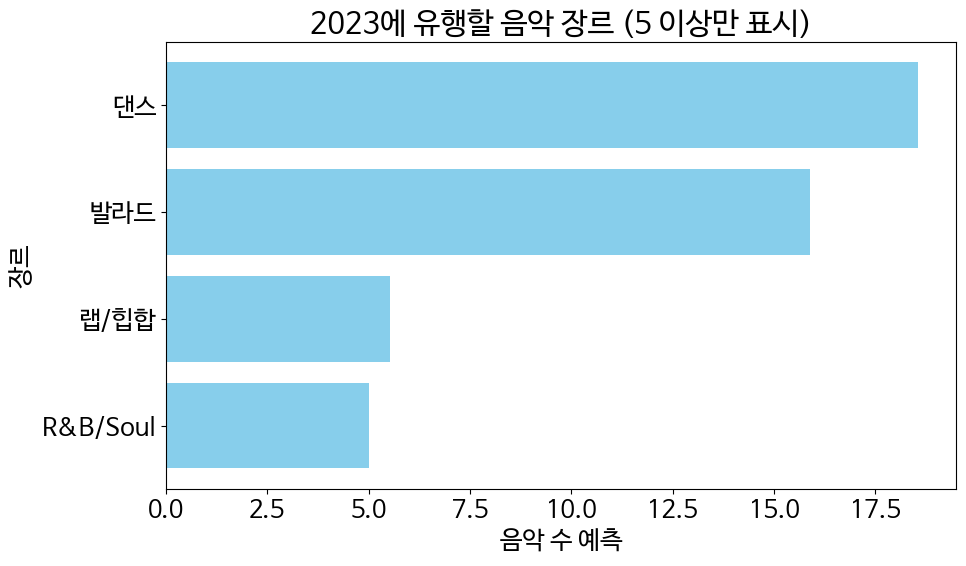

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# CSV 파일 읽기
file_path = 'Genre_count.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# 2022년 까지 데이터 추출
data_2022 = data[data['Year'] <= 2022].drop('Year', axis=1).values.flatten()

# ARIMA 모델 생성과 예측
predictions = {}
for idx, genre in enumerate(data.columns[1:]):
    genre_data = data[genre].values

    # ARIMA 모델 학습
    model = ARIMA(genre_data, order=(1, 2, 0))
    model_fit = model.fit()

    # 2023년 예측
    forecast = model_fit.forecast(steps=1)
    predictions[genre] = forecast[0]

# 결과 출력
print("2023년 각 장르의 예측 음악 수:")
for genre, prediction in predictions.items():
    print(f"{genre}: {int(prediction)}")

# 크기순으로 정렬
sorted_predictions = dict(sorted(predictions.items(), key=lambda x: x[1], reverse=True))

# 그래프를 그리기 전에 5 미만인 값을 필터링하여 새로운 딕셔너리 생성
filtered_predictions = {genre: pred for genre, pred in sorted_predictions.items() if pred >= 5}

if filtered_predictions:  # 만약에 값이 있는 경우에만 그래프 표시
    plt.figure(figsize=(10, 6))
    plt.barh(list(filtered_predictions.keys())[::-1], list(filtered_predictions.values())[::-1], color='skyblue')
    plt.xlabel('음악 수 예측')
    plt.ylabel('장르')
    plt.title('2023에 유행할 음악 장르 (5 이상만 표시)')
    plt.tight_layout()
    plt.show()


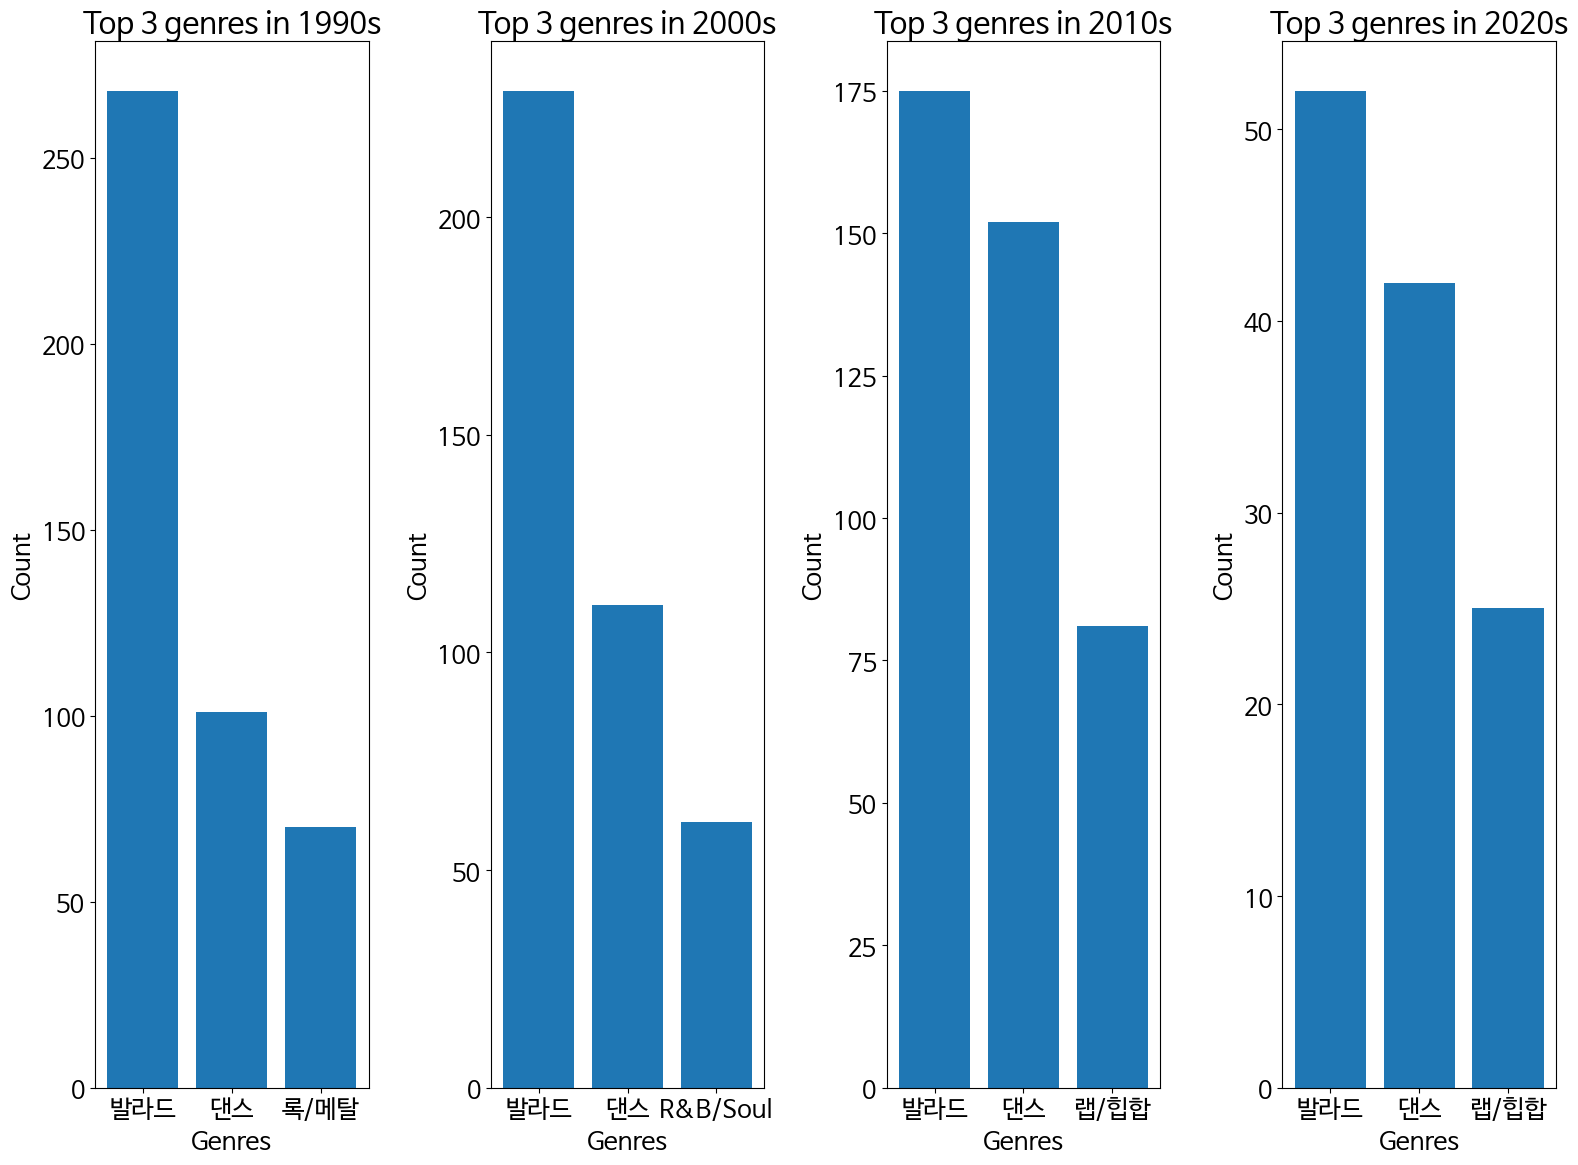

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기
data = pd.read_csv('Genre_count.csv')

# Year 열을 기준으로 정렬
data = data.sort_values(by='Year')

# Year 열 제거
data = data.drop(columns=['Year'])

# Year를 10년 단위로 자르기
data['Decade'] = ((data.index // 10) * 10) + 1990  # 1990을 더해 연도 형식으로 변환

# 각 10년 단위별 상위 3개 장르 찾기
decades = data.groupby('Decade').sum()

# 각 연도별로 상위 3개 장르 찾기
top3_genres = {}
for decade in decades.index:
    top3 = decades.loc[decade].nlargest(3).index.tolist()
    top3_genres[decade] = top3

# 막대 그래프로 시각화
fig, axs = plt.subplots(ncols=4, figsize=(16, 12))
axs = axs.flatten()

for i, decade in enumerate(top3_genres.keys()):
    ax = axs[i]
    genres = top3_genres[decade]
    values = decades.loc[decade][genres]
    ax.bar(genres, values)
    ax.set_title(f"Top 3 genres in {decade}s")
    ax.set_xlabel("Genres")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()
